In [36]:
# Based on MAC0417/5768 Visão e Processamento de Imagens
# from Prof. Dr. Paulo A. V. de Miranda

# Plot inline
%matplotlib inline
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt


def creatematrix(nrows, ncols):
    M = []
    for i in range(0,nrows):
        L = []
        for j in range(0,ncols):
            L.append(0)
        M.append(L)
    return M

def createcosineimage(nrows, ncols, theta, freq):
    M = creatematrix(nrows, ncols)
    dx = math.cos(theta)
    dy = math.sin(theta)
    for i in range(len(M)):
        for j in range(len(M[0])):
            #projecao vetorial:
            D = dx*j + dy*i
            M[i][j] = math.cos(D*2.0*math.pi*freq)/2.0+0.5
    A = np.array(M)
    A = np.floor(255*A)
    A = A.astype(np.uint8)
    return A

def to_fourier_spectrum(image):
    f = np.fft.fft2(image)
    # shift to center
    fshift = np.fft.fftshift(f)
    spectrum = 20*np.log(1+np.abs(fshift))
    return spectrum

def to_255_image(image):
    Imax = image.max()
    image = np.floor(255*(image/float(Imax)))
    image = image.astype(np.uint8)
    return image

def threshold_image(image, level):
    Imax = image.max()
    limit = float(level*Imax)
    image = np.where(image >limit)
    return image

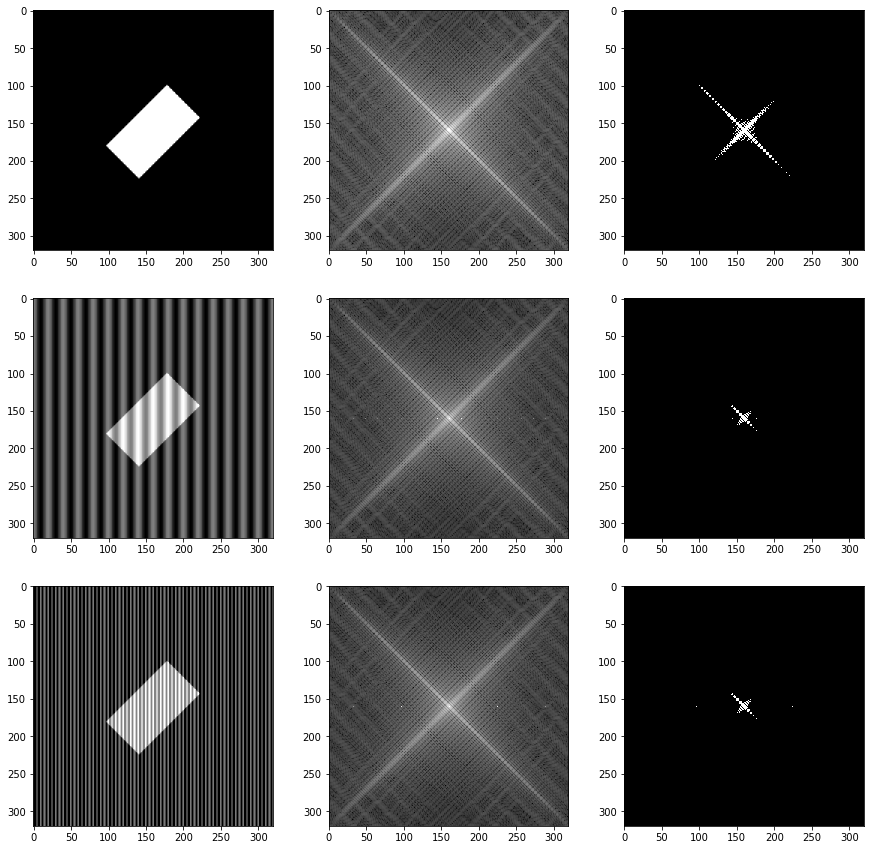

In [37]:
original_img = cv2.imread('quadrado3.png',0) #quadrado.png
h, w = original_img.shape
original_img = original_img.astype(np.float64)
spectrum_original = to_255_image(to_fourier_spectrum(original_img))
threshold_original = threshold_image(spectrum_original, 0.7)

low_freq_cosine_img = createcosineimage(h, w, 0.0*math.pi/2.0, 0.05)
img_low_freq_noise = original_img + low_freq_cosine_img
spectrum_low_freq_noise = to_255_image(to_fourier_spectrum(img_low_freq_noise))
img_low_freq_noise = to_255_image(img_low_freq_noise)
threshold_low_freq_noise = threshold_image(spectrum_low_freq_noise, 0.7)

high_freq_cosine_img = createcosineimage(h, w, 0.0*math.pi/2.0, 0.2)
img_high_freq_noise = original_img + high_freq_cosine_img
spectrum_high_freq_noise = to_255_image(to_fourier_spectrum(img_high_freq_noise))
img_high_freq_noise = to_255_image(img_high_freq_noise)
threshold_high_freq_noise = threshold_image(spectrum_high_freq_noise, 0.7)

fig, imgs = plt.subplots(3,3, figsize=(15,15))

imgs[0,0].imshow(original_img, cmap='gray')
imgs[0,1].imshow(spectrum_original, cmap='gray')
imgs[0,2].imshow(threshold_original, cmap='gray')
imgs[1,0].imshow(img_low_freq_noise, cmap='gray')
imgs[1,1].imshow(spectrum_low_freq_noise, cmap='gray')
imgs[1,2].imshow(threshold_low_freq_noise, cmap='gray')
imgs[2,0].imshow(img_high_freq_noise, cmap='gray')
imgs[2,1].imshow(spectrum_high_freq_noise, cmap='gray')
imgs[2,2].imshow(threshold_high_freq_noise, cmap='gray')


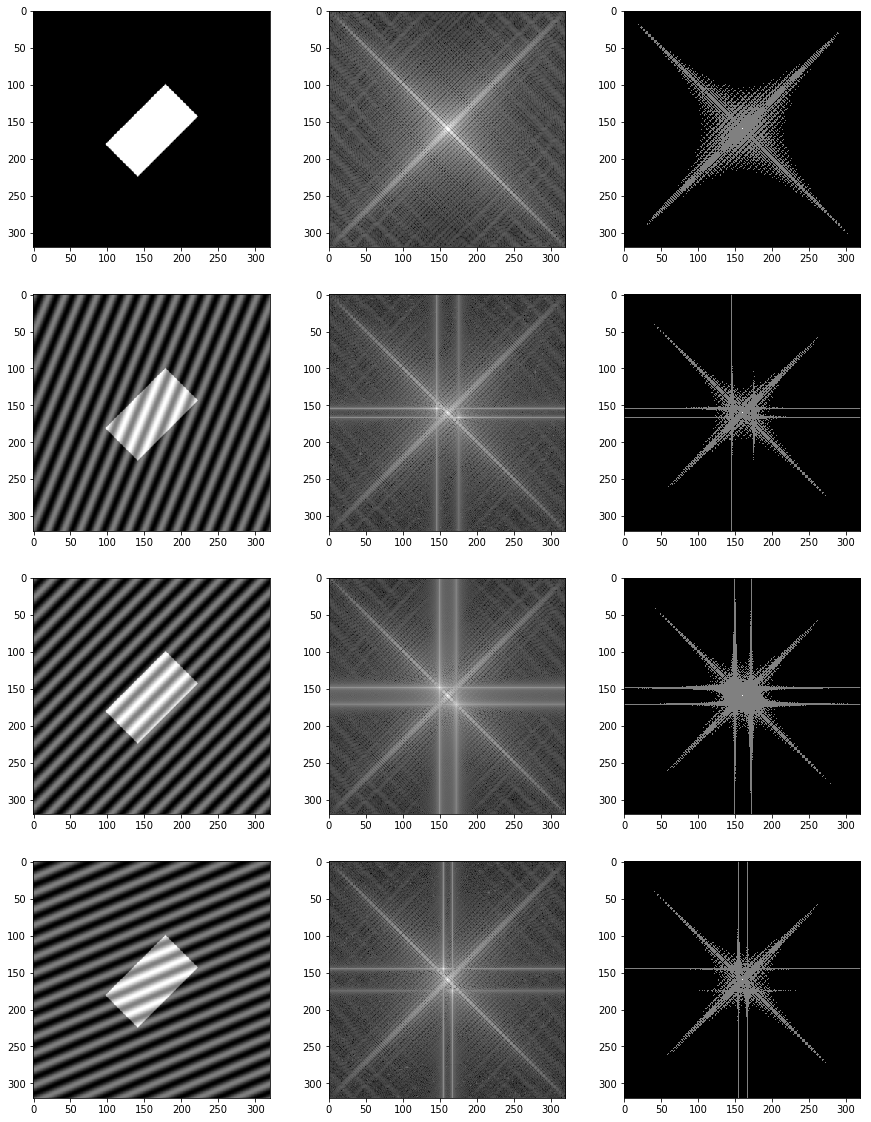

In [40]:
original_img = cv2.imread('quadrado3.png',0) #quadrado.png
h, w = original_img.shape
original_img = original_img.astype(np.float64)
spectrum_original = to_255_image(to_fourier_spectrum(original_img))
threshold_original = threshold_image(spectrum_original, 0.5)

low_theta_cosine_img = createcosineimage(h, w, 0.25*math.pi/2.0, 0.05)
img_low_theta_noise = original_img + low_theta_cosine_img
spectrum_low_theta_noise = to_255_image(to_fourier_spectrum(img_low_theta_noise))
img_low_theta_noise = to_255_image(img_low_theta_noise)
threshold_low_theta_noise = threshold_image(spectrum_low_theta_noise, 0.5)

high_theta_cosine_img = createcosineimage(h, w, 0.5*math.pi/2.0, 0.05)
img_high_theta_noise = original_img + high_theta_cosine_img
spectrum_high_theta_noise = to_255_image(to_fourier_spectrum(img_high_theta_noise))
img_high_theta_noise = to_255_image(img_high_theta_noise)
threshold_high_theta_noise = threshold_image(spectrum_high_theta_noise, 0.5)


higher_theta_cosine_img = createcosineimage(h, w, 0.75*math.pi/2.0, 0.05)
img_higher_theta_noise = original_img + higher_theta_cosine_img
spectrum_higher_theta_noise = to_255_image(to_fourier_spectrum(img_higher_theta_noise))
img_higher_theta_noise = to_255_image(img_higher_theta_noise)
threshold_higher_theta_noise = threshold_image(spectrum_higher_theta_noise, 0.5)

fig, imgs = plt.subplots(4,3, figsize=(15,20))

imgs[0,0].imshow(original_img, cmap='gray')
imgs[0,1].imshow(spectrum_original, cmap='gray')
imgs[0,2].imshow(threshold_original, cmap='gray')
imgs[1,0].imshow(img_low_theta_noise, cmap='gray')
imgs[1,1].imshow(spectrum_low_theta_noise, cmap='gray')
imgs[1,2].imshow(threshold_low_theta_noise, cmap='gray')
imgs[2,0].imshow(img_high_theta_noise, cmap='gray')
imgs[2,1].imshow(spectrum_high_theta_noise, cmap='gray')
imgs[2,2].imshow(threshold_high_theta_noise, cmap='gray')
imgs[3,0].imshow(img_higher_theta_noise, cmap='gray')
imgs[3,1].imshow(spectrum_higher_theta_noise, cmap='gray')
imgs[3,2].imshow(threshold_higher_theta_noise, cmap='gray')